![title](static/wcar.png)

    Michele Tinti
    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee

# Visualising RNA-seq datasets

In [61]:
#/homes/mtinti/miniconda3/envs/visCov/lib/python3.6/site-packages/svist4get

#drawing line 876 
#change
#self.canvas.drawCentredString(self.available_width / 2, y_top - 1.8 * self.height_of_string, self.information)
#to 
#self.canvas.drawCentredString(self.available_width * 0.02, y_top - 2 * self.height_of_string, self.information)

#data_processing line 87
#change
#if 'transcript_id' in subdata[0]:
#to
#if 'gene_id' in subdata[0]:

In [62]:
#reload when modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import pandas as pd

In [64]:
#/homes/mtinti/miniconda3/envs/visCov/lib/python3.6/site-packages/svist4get
#https://bitbucket.org/artegorov/svist4get/src/d65a01b5bf029d84090b93d7445fb8502aa9adbc/docs/API.md
import svist4get as sv4g
path_to_config = 'svist4get/svist4get_data/A4_p2.cfg'
pa = sv4g.manager.Parameters()
pa.initialize(path_to_config)

In [66]:
paths_to_bedgraphs = [
    '/homes/mtinti/RNAseq/viper-test/rna_seq/iRNAvivo/data/14256_1#1_/14256_1#1__coverage_bg.bed',
    '/homes/mtinti/RNAseq/viper-test/rna_seq/iRNAvivo/data/14256_1#2_/14256_1#2__coverage_bg.bed',
    '/homes/mtinti/RNAseq/viper-test/rna_seq/iRNAvivo/data/14256_1#3_/14256_1#3__coverage_bg.bed',
    '/homes/mtinti/RNAseq/viper-test/rna_seq/iRNAvivo/data/14256_1#4_/14256_1#4__coverage_bg.bed',   
    '/homes/mtinti/RNAseq/viper-test/rna_seq/iRNAvivo/data/ERR023000_/ERR023000__coverage_bg.bed',
    '/homes/mtinti/RNAseq/viper-test/rna_seq/iRNAvivo/data/ERR023001_/ERR023001__coverage_bg.bed'
]
pa.config['bedgraph'] = paths_to_bedgraphs
pa.config['bedgraph_label'] = ['E1', 'E2', 'E3','C4','L1','L2']#, 'E3','E4', 'C1', 'C2']

In [67]:
pa.config['gtf_file'] = '/homes/mtinti/RNAseq/viper-test/rit-seq/genomes/tb927/tb927.gtf'

In [68]:
pa.config['fasta_file'] = '/homes/mtinti/RNAseq/viper-test/rit-seq/genomes/tb927/tb927.fasta'

In [146]:
def get_region(in_gene, extend=2):
    gtf = pd.read_csv(pa.config['gtf_file'], sep='\t', header=None)
    gtf.columns = ['chro','source','ftype','start','end','n1','n2','n3','info']
    gtf['gene'] = [n.split(';')[0].split(' ')[-1].split(':')[0].strip('\"') for n in gtf['info']]
    
    temp = gtf.drop_duplicates(subset=['chro','gene'])
    temp = temp.reset_index(drop=True)
    selection = temp[temp['gene'].str.contains(in_gene)].index.values[0]
    from_index = selection-extend
    to_index = selection+extend
    if from_index<0:
        from_index=0
    if to_index > temp.shape[0]:
        to_index = temp.shape[0]-1
    
    temp = temp.iloc[selection-2:selection+3]
    chrom = temp['chro'].values[0]
    start = temp['start'].values[0]
    end = temp['end'].values[-1]
    return chrom, start, end
    

In [202]:
gene = 'Tb427VSG-1065'
chrom, start, end = get_region(gene,extend=5) 
print(chrom, start, end)
pa.config['window'] = [chrom, start, end]
pa.config['image_title'] = gene
pa.config['output_filename'] = gene
pa.config['revcomp_transform'] = 1

VSGs_chr 956512 960997


In [203]:
gtf = sv4g.data_processing.Gtf_helper(pa.config['gtf_file'])
transcripts = gtf.extract_transcripts_from_widnow(*pa.config['window'])
data_from_gtf = (gtf.extract_data_about_transcripts(transcripts))
pa.add_gtf_data(data_from_gtf)

In [206]:
tracks = []
tracks += sv4g.manager.Title_tracks_maker(pa).create_tracks()
tracks += sv4g.manager.Axis_tics_tracks_maker(pa).create_tracks()
tracks += sv4g.manager.Vgrid_tracks_maker(pa).create_tracks()
tracks += sv4g.manager.Transcript_struct_tracks_maker(pa).create_tracks()
tracks += sv4g.manager.Bedgraph_tracks_maker(pa).create_tracks()


In [163]:
'''
        region_length = (int(end) - int(start))
        print('ok', 'this is len(self.sequence):', len(self.sequence), 'this is region_length:', region_length)
        if len(self.sequence) != (region_length):
            fasta = name_of_file
            contig_length = 'N/A'
            for i in (SeqIO.parse(name_of_file, 'fasta')):
                if (str(i.id)) == name_of_scaffold:
                    contig_length = (len(str(i.seq)))
                    
            print("Warning: the window of " + name_of_scaffold + ':' + str(start) + '-' + str(end) + ' does not fit the contig ' + name_of_scaffold + ' as given in the supplied fasta file. The detected length of ' + name_of_scaffold + ' is ' + str(contig_length)  , file=sys.stderr)
'''
print()

In [207]:
#tracks += sv4g.manager.Aa_seq_tracks_maker(pa).create_tracks()

In [208]:
#from Bio import SeqIO
#for record in SeqIO.parse(pa.config['fasta_file'], "fasta"):
#    if record.id == 'Tb927_08_v5.1':
#        print(len(record.seq))
#        break

In [209]:
#import pandas as pd
#gtf = pd.read_csv(pa.config['gtf_file'],sep='\t', header=None)
#gtf[gtf[gtf.columns[0]]=='Tb927_08_v5.1'].sort_values(gtf.columns[4]).tail()

In [210]:
#!rm Tb927.8.8330.png
#!rm Tb927.8.8330.pdf

In [214]:
# saving image to the pdf file specified in parameters
sv4g.manager.Image(tracks, pa).draw()
# converting the resulting pdf to a png file
sv4g.methods.pdf_page_to_png(pa)

0 0 25.511811023622048 0 -25.511811023622048


Svist4getError: Unable to create the pdf file. There might be a problem with the 'reportlab' python package.

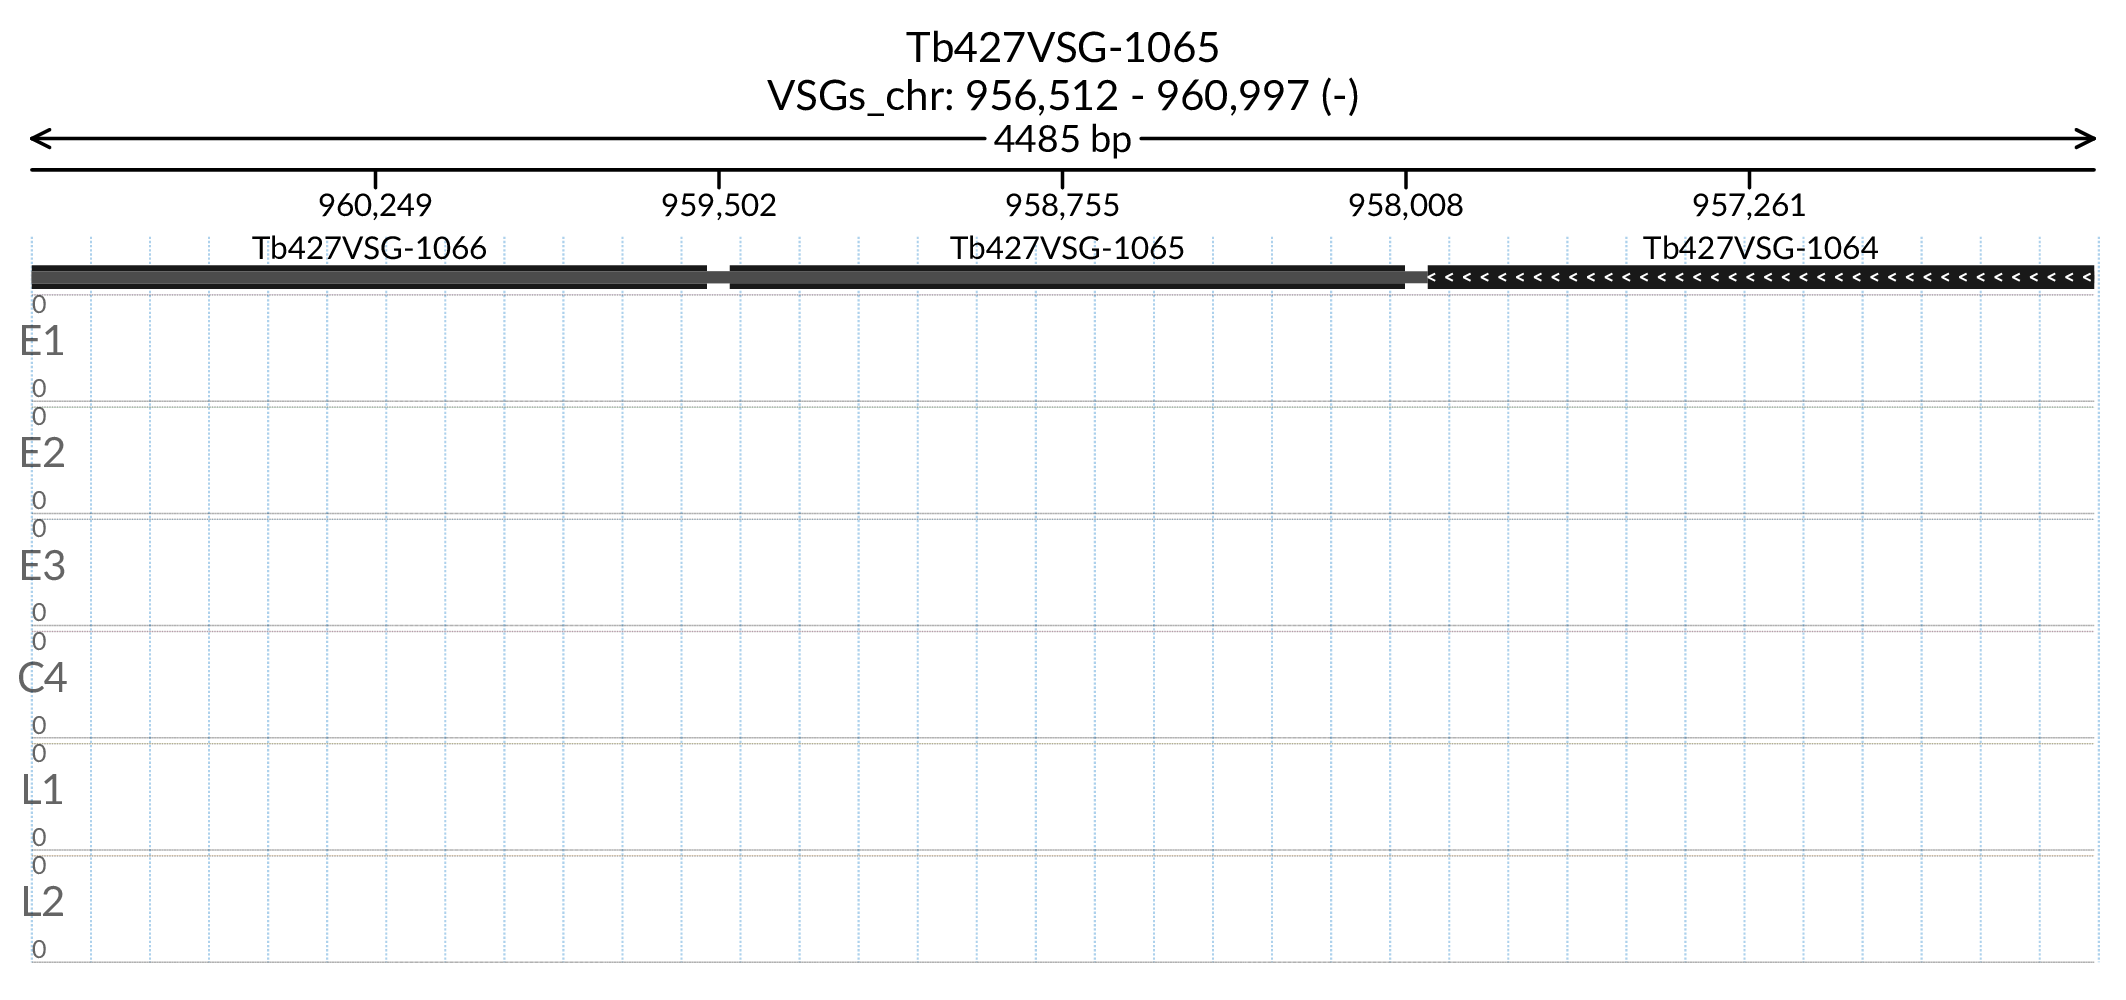

In [172]:
Image(filename='Tb427VSG-1065.png')

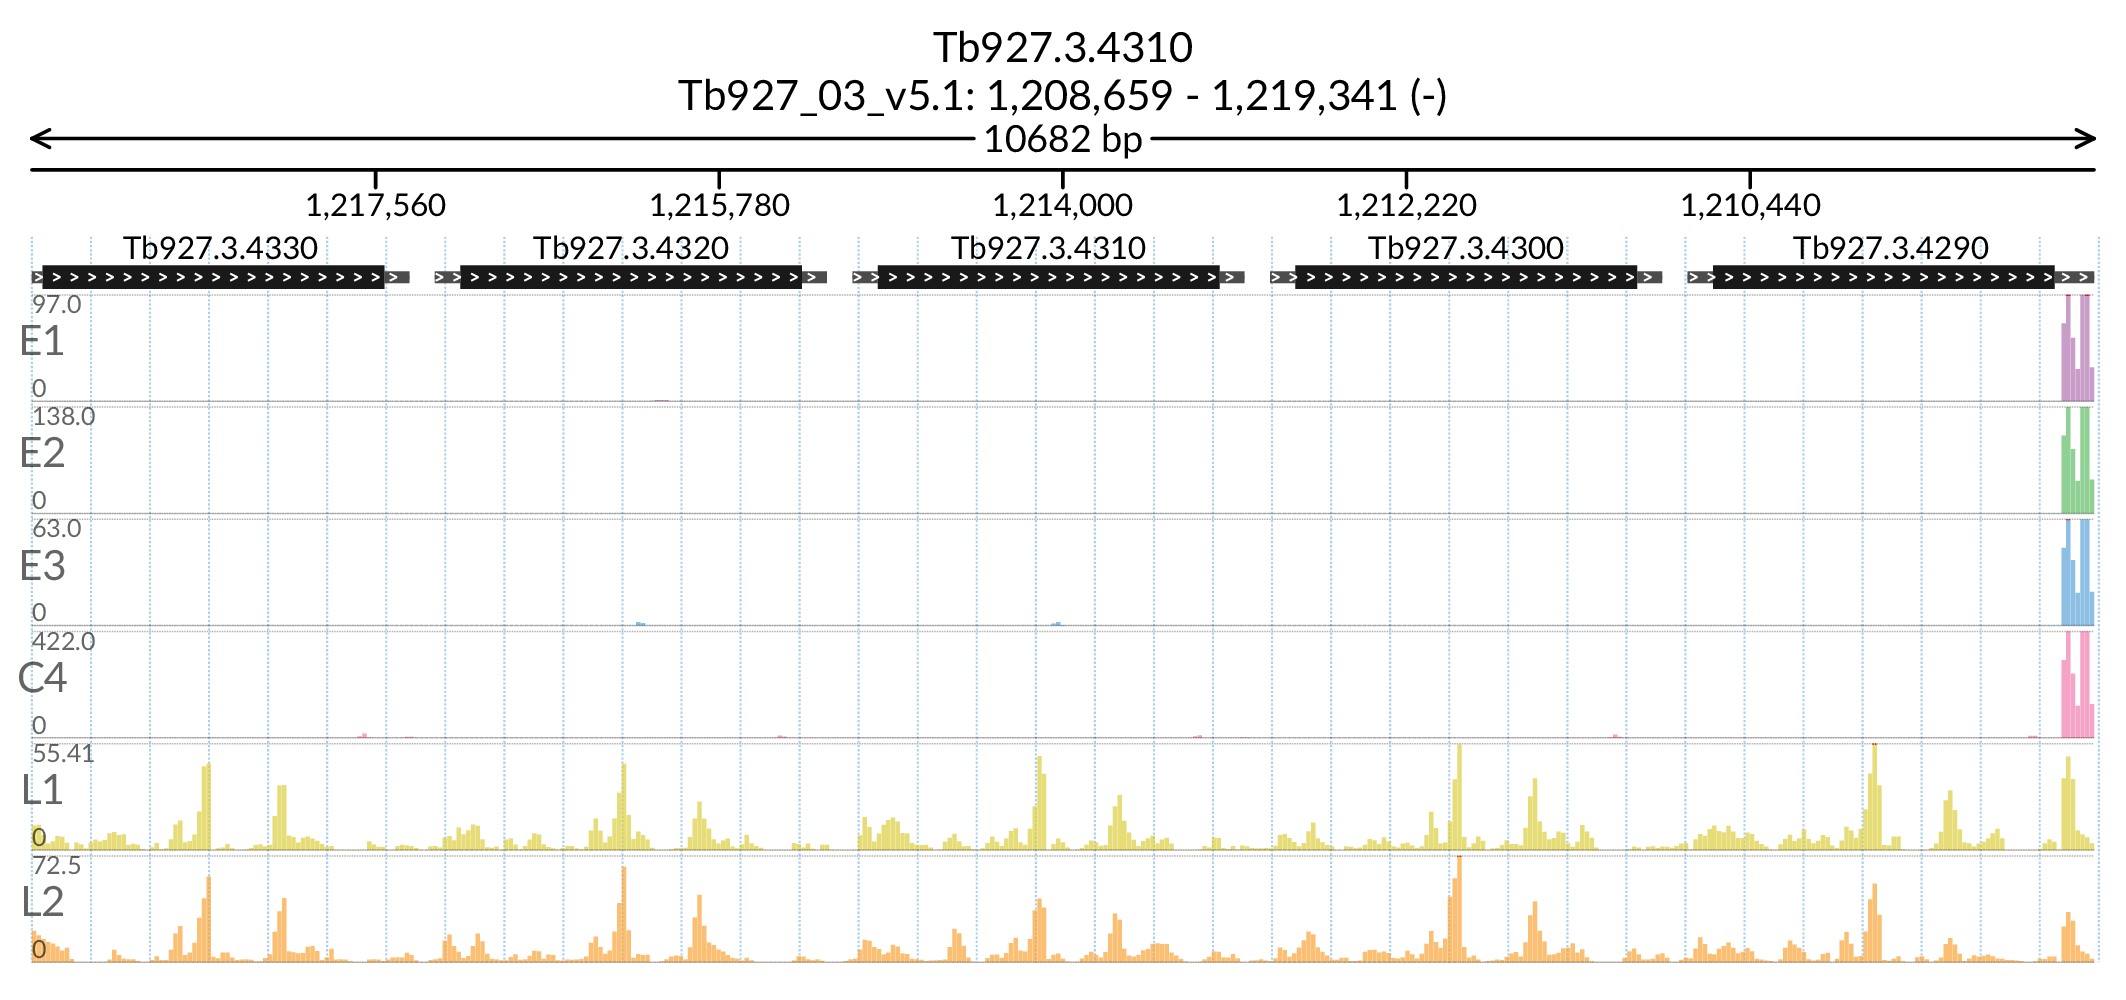

In [156]:
from IPython.display import Image
Image(filename='Tb927.3.4310.png')

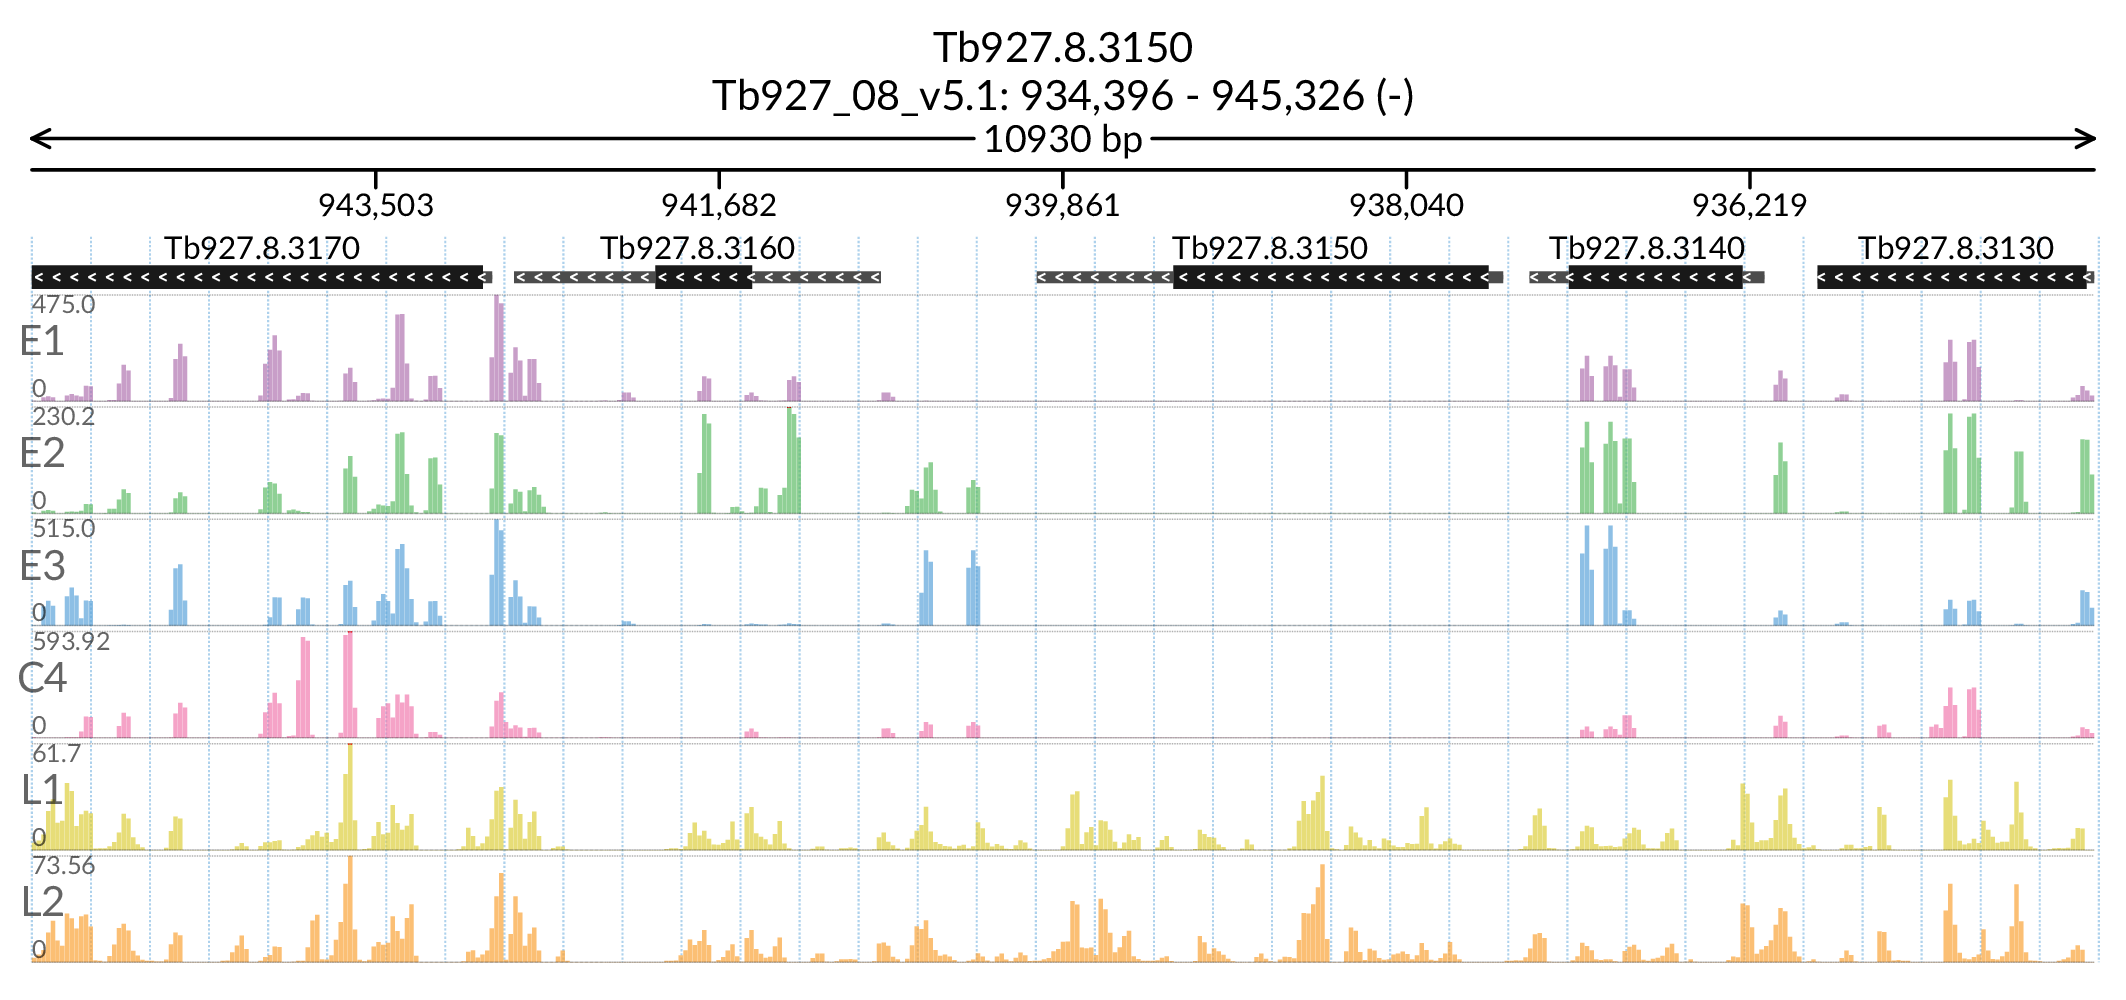

In [106]:
from IPython.display import Image
Image(filename='Tb927.8.3150.png')

In [20]:
!jupyter nbconvert --to html test_viz2.ipynb

[NbConvertApp] Converting notebook test_viz2.ipynb to html
[NbConvertApp] Writing 660626 bytes to test_viz2.html


In [176]:
df_list = [pd.read_csv(n,header=None,sep='\t') for  n in paths_to_bedgraphs]
for n in df_list:
    n.columns = ['cro','start','end','cov']
df_list[0].head()

,cro,start,end,cov
0,Tb927_01_v5.1,1,2,37
1,Tb927_01_v5.1,2,3,41
2,Tb927_01_v5.1,3,4,42
3,Tb927_01_v5.1,4,5,48
4,Tb927_01_v5.1,5,7,53


In [178]:
#fig,ax = plt.subplots(ncols=1, nrows=5, figsize=12,6)
print(chrom, start, end)

0
Empty DataFrame
Columns: [cro, start, end, cov]
Index: []
1
              cro   start     end  cov
1919740  VSGs_chr  958913  958960    2
1919741  VSGs_chr  959164  959172    1
1919742  VSGs_chr  959172  959185    2
1919743  VSGs_chr  959187  959218    2
2
Empty DataFrame
Columns: [cro, start, end, cov]
Index: []
3
              cro   start     end  cov
2289194  VSGs_chr  958913  958960    3
2289195  VSGs_chr  959172  959185    3
2289196  VSGs_chr  959187  959218    3
4
              cro   start     end  cov
3180245  VSGs_chr  958455  958456    1
3180246  VSGs_chr  958456  958464   65
3180247  VSGs_chr  958464  958467   66
3180248  VSGs_chr  958467  958468   67
3180249  VSGs_chr  958468  958483   68
3180250  VSGs_chr  958483  958486   66
3180251  VSGs_chr  958486  958491   64
3180252  VSGs_chr  958491  958492   62
3180253  VSGs_chr  958492  958494   61
3180254  VSGs_chr  958494  958495   59
3180255  VSGs_chr  958495  958496   57
3180256  VSGs_chr  958496  958499   55
3180257  VSGs_ch

0
1
2
3
4
5


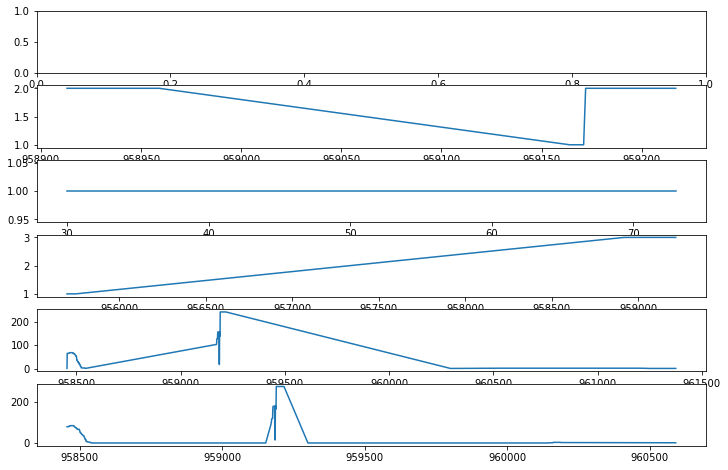

In [217]:
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(ncols=1, nrows=6, figsize=(12,8))
for index,n in enumerate(df_list):
    print(index)
    temp = n[(n['cro']=='VSGs_chr') &  (n['start']>955512) & (n['end']<961997)]
    if temp.shape[0]==0:
        continue
    x = []
    y = []
    for a,b,c in zip(temp['start'],temp['end'],temp['cov']):
        x+=list(np.arange(a,b,1))
        y+=[c for n in np.arange(a,b,1)]
    
        

    axes[index].plot(x,y)

In [191]:
axes[5]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [215]:
!pyGenomeTracks --tracks tracks.ini --region 'VSGs_chr:955512-961997' --outFileName nice_image.pdf

INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1865.4170172214508
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 32.375. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [14256_1#1__coverage_bg]

DEBUG:pygenometracks.tracks.GenomeTrack:ylim 100,0
INFO:pygenometracks.tracksClass:plotting 4. [14256_1#2__coverage_bg]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 560.0,0
INFO:pygenometracks.tracksClass:plotting 5. [14256_1#3__coverage_bg]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 100,0
INFO:pygenometracks.tracksClass:plotting 6. [14256_1#4__coverage_bg]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 330.0,0
INFO:pygenometracks.tracksClass:plotting 7. [ERR023000__coverage_bg]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 4469.999999999999,0
INFO:pygenometracks.tracksClass:plotting 8. [ERR023001__coverage_bg]
DEBUG:pyge

In [216]:
from IPython.display import IFrame
IFrame("nice_image.pdf", width=600, height=300)